In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [0]:
import pandas as pd

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
w_train = pd.read_csv("weather_train.csv")
w_test = pd.read_csv("weather_test.csv")
meta_building = pd.read_csv("building_metadata.csv")

In [0]:
mer_data = pd.merge(train, meta_building, on = 'building_id')

In [0]:
mer_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN
1,0,0,2016-01-01 01:00:00,0.0,0,Education,7432,2008.0,NaN
2,0,0,2016-01-01 02:00:00,0.0,0,Education,7432,2008.0,NaN
3,0,0,2016-01-01 03:00:00,0.0,0,Education,7432,2008.0,NaN
4,0,0,2016-01-01 04:00:00,0.0,0,Education,7432,2008.0,NaN


In [0]:
set(mer_data['primary_use'])

{'Education',
 'Entertainment/public assembly',
 'Food sales and service',
 'Healthcare',
 'Lodging/residential',
 'Manufacturing/industrial',
 'Office',
 'Other',
 'Parking',
 'Public services',
 'Religious worship',
 'Retail',
 'Services',
 'Technology/science',
 'Utility',
 'Warehouse/storage'}

In [0]:
mer2_data = mer_data[(mer_data['site_id']==2)&(mer_data['primary_use']=='Office')]

In [0]:
mer2_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
1620351,157,0,2016-01-01 00:00:00,28.10,2,Office,5258,NaN,NaN
1620352,157,0,2016-01-01 01:00:00,26.57,2,Office,5258,NaN,NaN
1620353,157,0,2016-01-01 02:00:00,25.73,2,Office,5258,NaN,NaN
1620354,157,0,2016-01-01 03:00:00,25.96,2,Office,5258,NaN,NaN
1620355,157,0,2016-01-01 04:00:00,25.59,2,Office,5258,NaN,NaN


In [0]:
site2_office = mer2_data.groupby(['timestamp'])['meter_reading'].sum()

In [0]:
site2_office

timestamp
2016-01-01 00:00:00    2733.1470
2016-01-01 01:00:00    2727.7944
2016-01-01 02:00:00    2777.4856
2016-01-01 03:00:00    2874.1859
2016-01-01 04:00:00    2945.0675
                         ...    
2016-12-31 19:00:00    2849.6376
2016-12-31 20:00:00    2845.4954
2016-12-31 21:00:00    2838.7294
2016-12-31 22:00:00    2652.2397
2016-12-31 23:00:00    2605.6898
Name: meter_reading, Length: 8784, dtype: float64

In [0]:
import matplotlib.pyplot as plt

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
!pip install pyramid.arima

     |████████████████████████████████| 604kB 5.1MB/s 


In [0]:
from pyramid.arima import auto_arima

In [0]:
import statsmodels.tsa

In [117]:
np.argmin(statsmodels.tsa.stattools.pacf(total3['meter_reading'],nlags=400))

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


345

In [115]:
statsmodels.tsa.stattools.pacf(total3['meter_reading'])

array([ 1.        ,  0.97396275, -0.6191259 , -0.14623903, -0.16308026,
       -0.124705  ,  0.00472402,  0.13442026,  0.11153502,  0.09232125,
        0.14821811,  0.2049728 ,  0.15264499,  0.09657113,  0.19026704,
        0.17802076,  0.08201226,  0.14895655,  0.17760891,  0.13401211,
        0.04059858,  0.05518109,  0.08846634,  0.05053221, -0.16051853,
       -0.35156359, -0.15669166,  0.00865804,  0.00735726,  0.02980266,
        0.02384198,  0.05214041,  0.03577906,  0.0248108 ,  0.00269162,
        0.00240805,  0.01863784, -0.01505159,  0.01472743, -0.00287138,
       -0.0214162 ])

In [118]:
346/24

14.416666666666666

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


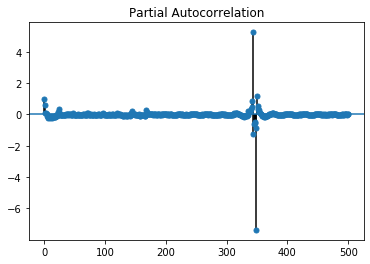

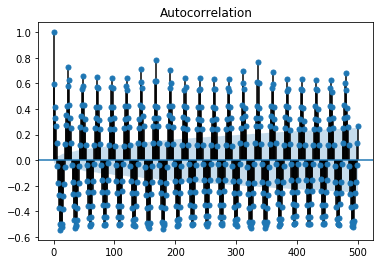

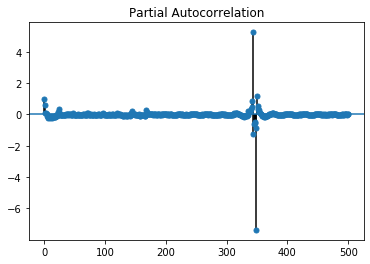

In [108]:

plot_acf(total3['meter_reading'].diff(1).dropna(),lags=500)


plot_pacf(total3['meter_reading'].diff(1).dropna(),lags=500)

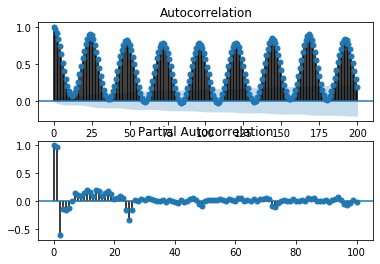

In [0]:
fig, axes = plt.subplots(2,1)
plot_acf(site2_office, lags=200, ax=axes[0])
plot_pacf(site2_office, lags=100, ax=axes[1])
plt.show()

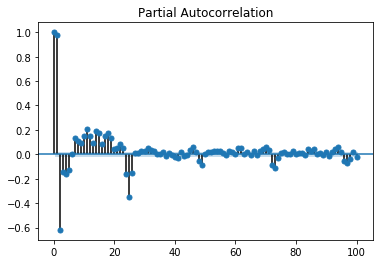

In [98]:
plot_pacf(site2_office, lags=100)
plt.show()

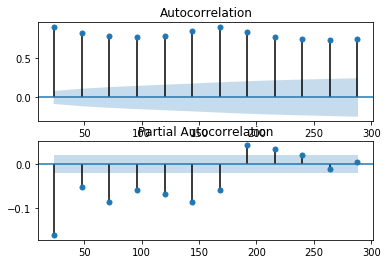

In [121]:
fig, axes = plt.subplots(2,1)
plot_acf(site2_office, lags=[24,48,72,96,120,144,168,192,216,240,264,288], ax=axes[0])
plot_pacf(site2_office, lags=[24,48,72,96,120,144,168,192,216,240,264,288], ax=axes[1])
plt.show()

In [0]:
import numpy as np

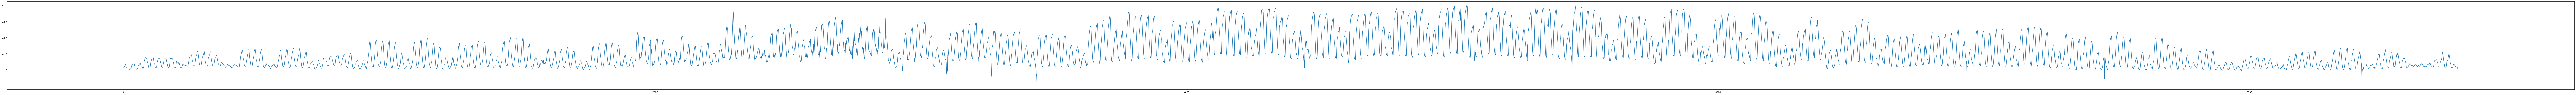

In [64]:
fig = plt.figure(figsize=(200,7))
plt.plot(total2['meter_reading'])

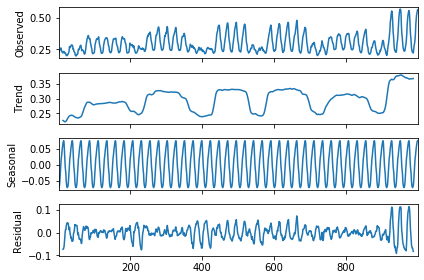

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(total2.iloc[:,1][1:1000],model = 'additive', 
                            freq=24)

# Plot decomposition

decomp.plot()
plt.show()

In [0]:
total3 = total2.copy()

In [90]:
total3

,timestamp,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
0,2016-01-01 00:00:00,0.221033,0.297778,0.286420,0.007519,0.553633,0.233766
1,2016-01-01 01:00:00,0.220558,0.260000,0.286420,0.007519,0.564014,0.266234
2,2016-01-01 02:00:00,0.224972,0.246667,0.286420,0.007519,0.577855,0.201299
3,2016-01-01 03:00:00,0.233563,0.222222,0.274074,0.007519,0.598616,0.201299
4,2016-01-01 04:00:00,0.239860,0.211111,0.259259,0.007519,0.612457,0.201299
...,...,...,...,...,...,...,...
8779,2016-12-31 19:00:00,0.231382,0.284444,0.698765,0.007519,0.453287,0.233766
8780,2016-12-31 20:00:00,0.231014,0.308889,0.671605,0.007519,0.429066,0.233766
8781,2016-12-31 21:00:00,0.230413,0.322222,0.656790,0.007519,0.411765,0.298701
8782,2016-12-31 22:00:00,0.213846,0.322222,0.671605,0.007519,0.404844,0.233766


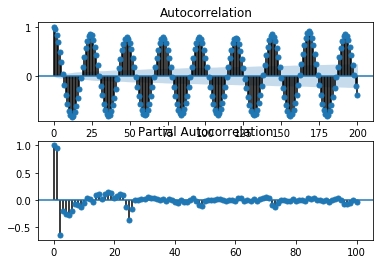

In [91]:
tmp = total3['meter_reading'] - total3['meter_reading'].rolling(24).mean()
# Drop NaN values
tmp = tmp.dropna()
fig, axes = plt.subplots(2,1)
plot_acf(tmp, lags=200, ax=axes[0])
plot_pacf(tmp, lags=100, ax=axes[1])
plt.show()

In [87]:
auto_arima()

(0, 7)

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [0]:
model = SARIMAX(df, order=(p,d,q), seasonal_order=(P,D,Q,24))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:386: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: ignored

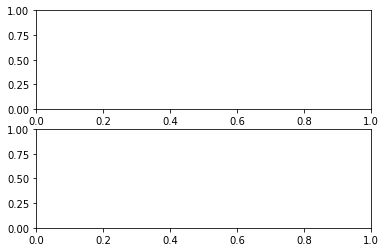

In [86]:
fig, axes = plt.subplots(2,1)
plot_acf(total3['meter_reading'], lags=200, ax=axes[0])
plot_pacf(total3['meter_reading'], lags=100, ax=axes[1])
plt.show()

In [75]:
pd.DataFrame(np.array(total2.iloc[:,1:]) +1)[0]

0       1.221033
1       1.220558
2       1.224972
3       1.233563
4       1.239860
          ...   
8779    1.231382
8780    1.231014
8781    1.230413
8782    1.213846
8783    1.209710
Name: 0, Length: 8784, dtype: float64

In [0]:
site2_weather = w_train[w_train['site_id'] == 2]

In [0]:
site2_weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
17547,2,2016-01-01 00:00:00,15.6,6.0,-5.6,NaN,1015.3,270.0,3.6
17548,2,2016-01-01 01:00:00,13.9,NaN,-5.6,0.0,1015.6,270.0,4.1
17549,2,2016-01-01 02:00:00,13.3,2.0,-5.6,0.0,1016.0,270.0,3.1
17550,2,2016-01-01 03:00:00,12.2,0.0,-6.1,0.0,1016.6,280.0,3.1
17551,2,2016-01-01 04:00:00,11.7,2.0,-6.7,0.0,1017.0,270.0,3.1


In [0]:
site2_weather.isnull().sum()

site_id                  0
timestamp                0
air_temperature          1
cloud_coverage        2354
dew_temperature          1
precip_depth_1_hr       66
sea_level_pressure      44
wind_direction         591
wind_speed               5
dtype: int64

In [0]:
exo2 = site2_weather[['timestamp','air_temperature','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_speed']]

In [0]:
exo2.shape

(8783, 6)

In [0]:
exo2 = exo2.fillna(method='bfill')

In [0]:
exo2.head()

,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
17547,2016-01-01 00:00:00,15.6,-5.6,0.0,1015.3,3.6
17548,2016-01-01 01:00:00,13.9,-5.6,0.0,1015.6,4.1
17549,2016-01-01 02:00:00,13.3,-5.6,0.0,1016.0,3.1
17550,2016-01-01 03:00:00,12.2,-6.1,0.0,1016.6,3.1
17551,2016-01-01 04:00:00,11.7,-6.7,0.0,1017.0,3.1


In [0]:
exo2.shape

(8783, 5)

In [0]:
site2_office.shape

(8784,)

In [0]:
exo2.tail()

,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
26325,2016-12-31 19:00:00,15.0,11.1,0.0,1012.4,3.6
26326,2016-12-31 20:00:00,16.1,10.0,0.0,1011.7,3.6
26327,2016-12-31 21:00:00,16.7,9.4,0.0,1011.2,4.6
26328,2016-12-31 22:00:00,16.7,10.0,0.0,1011.0,3.6
26329,2016-12-31 23:00:00,16.7,10.0,0.0,1011.0,2.6


In [0]:
site2_office.tail()

timestamp
2016-12-31 19:00:00    2849.6376
2016-12-31 20:00:00    2845.4954
2016-12-31 21:00:00    2838.7294
2016-12-31 22:00:00    2652.2397
2016-12-31 23:00:00    2605.6898
Name: meter_reading, dtype: float64

In [0]:
site2_office.head()

timestamp
2016-01-01 00:00:00    2733.1470
2016-01-01 01:00:00    2727.7944
2016-01-01 02:00:00    2777.4856
2016-01-01 03:00:00    2874.1859
2016-01-01 04:00:00    2945.0675
Name: meter_reading, dtype: float64

In [0]:
pd.merge(site2_office,exo2, how='outer', on='timestamp').isnull().sum()

timestamp             0
meter_reading         0
air_temperature       1
dew_temperature       1
precip_depth_1_hr     1
sea_level_pressure    1
wind_speed            1
dtype: int64

In [0]:
total = pd.merge(site2_office,exo2, how='outer', on='timestamp').fillna(method='bfill')

In [0]:
total2 = total.copy()

In [0]:
from sklearn import preprocessing

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
for i in [1,2,3,4,5,6] :
  
  float_array = total.iloc[:,i].values.astype(float)
  scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
  total2.iloc[:,i] = pd.DataFrame(scaled_array)

In [0]:
float_array = total.iloc[:,1].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
total2.iloc[:,1]=scaled_array


In [0]:
float_array = total.iloc[:,2].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
total2.iloc[:,2]=scaled_array


In [0]:
float_array = total.iloc[:,6].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
total2.iloc[:,6]=scaled_array


In [43]:
total.head(30)

,timestamp,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
0,2016-01-01 00:00:00,2733.1470,15.6,-5.6,0.0,1015.3,3.6
1,2016-01-01 01:00:00,2727.7944,13.9,-5.6,0.0,1015.6,4.1
2,2016-01-01 02:00:00,2777.4856,13.3,-5.6,0.0,1016.0,3.1
3,2016-01-01 03:00:00,2874.1859,12.2,-6.1,0.0,1016.6,3.1
4,2016-01-01 04:00:00,2945.0675,11.7,-6.7,0.0,1017.0,3.1
5,2016-01-01 05:00:00,3006.1453,10.0,-6.7,0.0,1017.2,1.5
6,2016-01-01 06:00:00,3075.5056,9.4,-6.1,0.0,1017.4,0.0
7,2016-01-01 07:00:00,3166.7465,7.2,-5.6,0.0,1017.3,0.0
8,2016-01-01 08:00:00,3044.4075,7.2,-6.7,0.0,1017.0,1.5
9,2016-01-01 09:00:00,2915.2176,6.1,-5.0,0.0,1016.9,0.0


In [44]:
total2.head(30)

,timestamp,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
0,2016-01-01 00:00:00,0.221033,0.297778,0.286420,0.007519,0.553633,0.233766
1,2016-01-01 01:00:00,0.220558,0.260000,0.286420,0.007519,0.564014,0.266234
2,2016-01-01 02:00:00,0.224972,0.246667,0.286420,0.007519,0.577855,0.201299
3,2016-01-01 03:00:00,0.233563,0.222222,0.274074,0.007519,0.598616,0.201299
4,2016-01-01 04:00:00,0.239860,0.211111,0.259259,0.007519,0.612457,0.201299
5,2016-01-01 05:00:00,0.245286,0.173333,0.259259,0.007519,0.619377,0.097403
6,2016-01-01 06:00:00,0.251448,0.160000,0.274074,0.007519,0.626298,0.000000
7,2016-01-01 07:00:00,0.259553,0.111111,0.286420,0.007519,0.622837,0.000000
8,2016-01-01 08:00:00,0.248685,0.111111,0.259259,0.007519,0.612457,0.097403
9,2016-01-01 09:00:00,0.237208,0.086667,0.301235,0.007519,0.608997,0.000000


In [21]:
total.shape

(8784, 7)

In [20]:
pd.DataFrame(scaled_array)

,0
0,0.221033
1,0.220558
2,0.224972
3,0.233563
4,0.239860
...,...
8779,0.231382
8780,0.231014
8781,0.230413
8782,0.213846


In [0]:
total.head()

,timestamp,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
0,2016-01-01 00:00:00,2733.1470,15.6,-5.6,0.0,1015.3,3.6
1,2016-01-01 01:00:00,2727.7944,13.9,-5.6,0.0,1015.6,4.1
2,2016-01-01 02:00:00,2777.4856,13.3,-5.6,0.0,1016.0,3.1
3,2016-01-01 03:00:00,2874.1859,12.2,-6.1,0.0,1016.6,3.1
4,2016-01-01 04:00:00,2945.0675,11.7,-6.7,0.0,1017.0,3.1


In [0]:
total['meter_reading']

0       2733.1470
1       2727.7944
2       2777.4856
3       2874.1859
4       2945.0675
          ...    
8779    2849.6376
8780    2845.4954
8781    2838.7294
8782    2652.2397
8783    2605.6898
Name: meter_reading, Length: 8784, dtype: float64

In [0]:
total.head(30)

,timestamp,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
0,2016-01-01 00:00:00,2733.1470,15.6,-5.6,0.0,1015.3,3.6
1,2016-01-01 01:00:00,2727.7944,13.9,-5.6,0.0,1015.6,4.1
2,2016-01-01 02:00:00,2777.4856,13.3,-5.6,0.0,1016.0,3.1
3,2016-01-01 03:00:00,2874.1859,12.2,-6.1,0.0,1016.6,3.1
4,2016-01-01 04:00:00,2945.0675,11.7,-6.7,0.0,1017.0,3.1
5,2016-01-01 05:00:00,3006.1453,10.0,-6.7,0.0,1017.2,1.5
6,2016-01-01 06:00:00,3075.5056,9.4,-6.1,0.0,1017.4,0.0
7,2016-01-01 07:00:00,3166.7465,7.2,-5.6,0.0,1017.3,0.0
8,2016-01-01 08:00:00,3044.4075,7.2,-6.7,0.0,1017.0,1.5
9,2016-01-01 09:00:00,2915.2176,6.1,-5.0,0.0,1016.9,0.0


In [45]:
total2

,timestamp,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
0,2016-01-01 00:00:00,0.221033,0.297778,0.286420,0.007519,0.553633,0.233766
1,2016-01-01 01:00:00,0.220558,0.260000,0.286420,0.007519,0.564014,0.266234
2,2016-01-01 02:00:00,0.224972,0.246667,0.286420,0.007519,0.577855,0.201299
3,2016-01-01 03:00:00,0.233563,0.222222,0.274074,0.007519,0.598616,0.201299
4,2016-01-01 04:00:00,0.239860,0.211111,0.259259,0.007519,0.612457,0.201299
...,...,...,...,...,...,...,...
8779,2016-12-31 19:00:00,0.231382,0.284444,0.698765,0.007519,0.453287,0.233766
8780,2016-12-31 20:00:00,0.231014,0.308889,0.671605,0.007519,0.429066,0.233766
8781,2016-12-31 21:00:00,0.230413,0.322222,0.656790,0.007519,0.411765,0.298701
8782,2016-12-31 22:00:00,0.213846,0.322222,0.671605,0.007519,0.404844,0.233766


In [0]:
model_1 = auto_arima(total2['meter_reading'],exogenous = total2.iloc[:,2:], max_p= 2, max_q=50,out_of_sample_size = 720)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.


In [0]:
total.head()

,timestamp,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
0,2016-01-01 00:00:00,2733.1470,15.6,-5.6,0.0,1015.3,3.6
1,2016-01-01 01:00:00,2727.7944,13.9,-5.6,0.0,1015.6,4.1
2,2016-01-01 02:00:00,2777.4856,13.3,-5.6,0.0,1016.0,3.1
3,2016-01-01 03:00:00,2874.1859,12.2,-6.1,0.0,1016.6,3.1
4,2016-01-01 04:00:00,2945.0675,11.7,-6.7,0.0,1017.0,3.1


In [0]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8064
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -59258.456
Date:                Fri, 15 Nov 2019   AIC                         118538.913
Time:                        07:37:02   BIC                         118615.858
Sample:                             0   HQIC                        118565.239
                               - 8064                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4199      0.379      6.381      0.000       1.677       3.163
x1           -45.6527      4.656     -9.805      0.000     -54.778     -36.527
x2           -49.9881      4.453    -11.226      0.000     -58.715     -41.261
x3             8.2310      0.439     18.735      0.000       7.370       9.092
x4           225.6792      9.320     24.215      0.000     207.413     243.946
x5            14.8525      2.776      5.350      0.000       9.412      20.293
ar.L1          1.9289      0.001   3676.473      0.000       1.928       1.930
ar.L2         -0.9969      0.000  -2041.748      0.000      -0.998      -0.996
ma.L1         -1.9178      0.002  -1240.059      0.000      -1.921      -1.915
ma.L2          0.9860      0.001    667.366      0.000       0.983       0.989
sigma2      1.745e+05   1118.327    156.076      0.000    1.72e+05    1.77e+05
===================================================================================
Ljung-Box (Q):                     2741.24   Jarque-Bera (JB):            163152.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.58e+14. Standard errors may be unstable.
"""

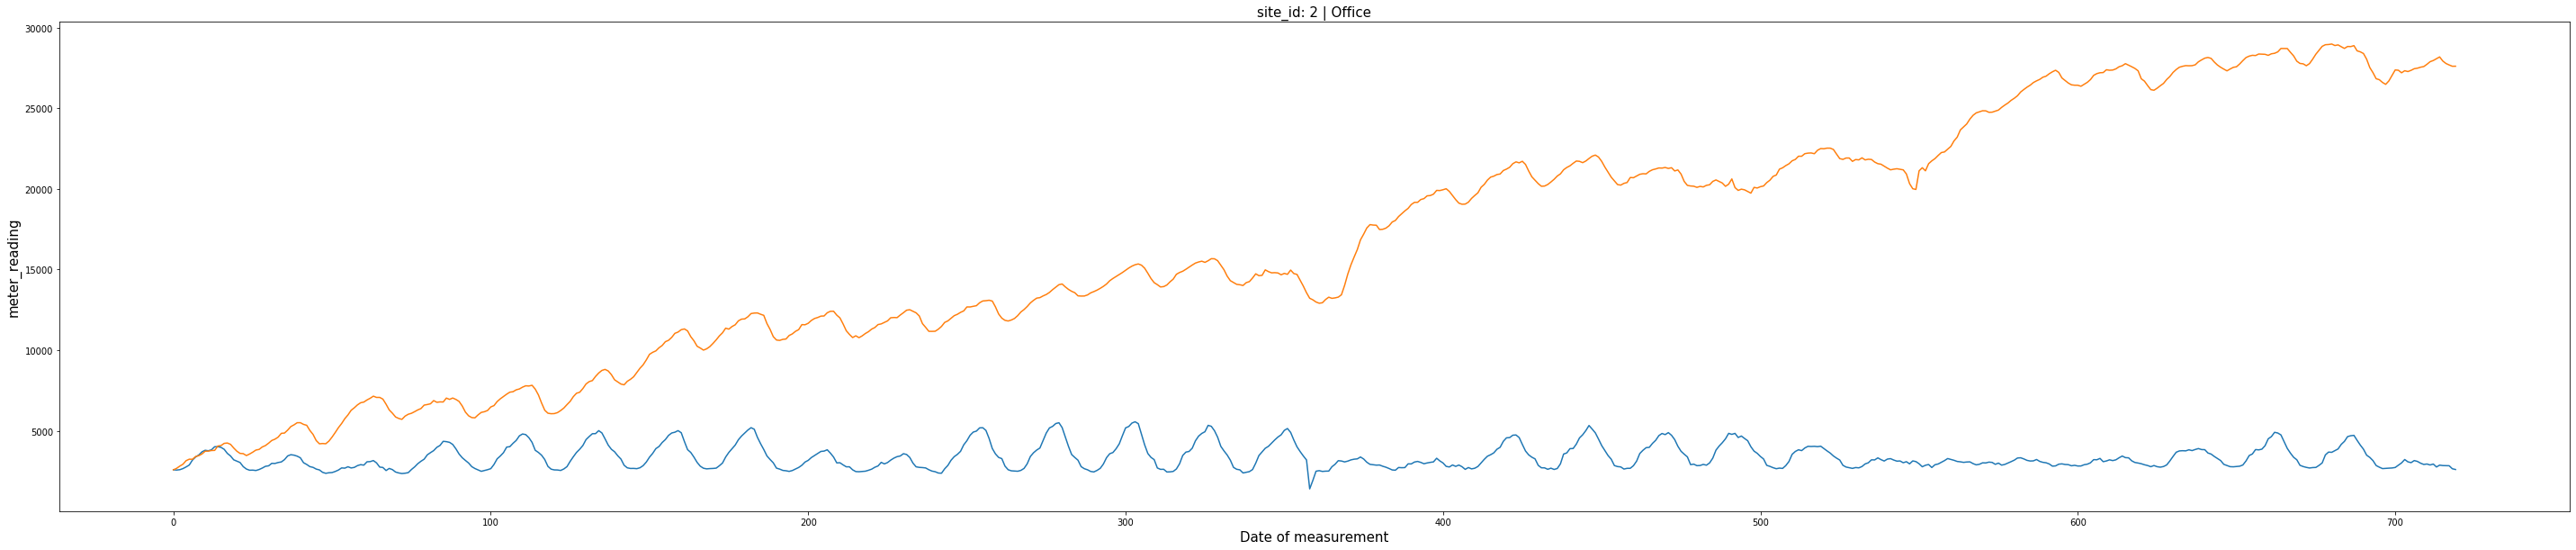

In [0]:
fig = plt.figure(figsize=(50,10))
plt.title('site_id: 2 | Office' ,fontsize=15)
plt.xlabel("Date of measurement",fontsize=15)
plt.ylabel("meter_reading",fontsize=15)
plt.plot(total['meter_reading'][-720:].reset_index(drop = True))
plt.plot(model_1.predict(n_periods = 720, exogenous=total.iloc[-720:,2:]))
plt.savefig('1',bbox_inches="tight")

In [124]:
model_4 = auto_arima(total3['meter_reading'],exogenous = total3.iloc[:,2:], max_p= 5, max_q=4,max_P = 8, S=24,out_of_sample_size = 720)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

In [0]:
auto_arima()

In [122]:
total3.head()

,timestamp,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
0,2016-01-01 00:00:00,0.221033,0.297778,0.286420,0.007519,0.553633,0.233766
1,2016-01-01 01:00:00,0.220558,0.260000,0.286420,0.007519,0.564014,0.266234
2,2016-01-01 02:00:00,0.224972,0.246667,0.286420,0.007519,0.577855,0.201299
3,2016-01-01 03:00:00,0.233563,0.222222,0.274074,0.007519,0.598616,0.201299
4,2016-01-01 04:00:00,0.239860,0.211111,0.259259,0.007519,0.612457,0.201299


In [0]:
total.iloc[-720:,[0,2,3,4,5,6]]

,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
8064,2016-12-02 00:00:00,15.6,-5.6,0.0,1011.0,2.6
8065,2016-12-02 01:00:00,13.3,-3.3,0.0,1011.3,2.6
8066,2016-12-02 02:00:00,12.2,-2.2,0.0,1011.7,2.1
8067,2016-12-02 03:00:00,11.1,-1.1,0.0,1011.9,1.5
8068,2016-12-02 04:00:00,11.7,-3.3,0.0,1012.0,2.1
...,...,...,...,...,...,...
8779,2016-12-31 19:00:00,15.0,11.1,0.0,1012.4,3.6
8780,2016-12-31 20:00:00,16.1,10.0,0.0,1011.7,3.6
8781,2016-12-31 21:00:00,16.7,9.4,0.0,1011.2,4.6
8782,2016-12-31 22:00:00,16.7,10.0,0.0,1011.0,3.6


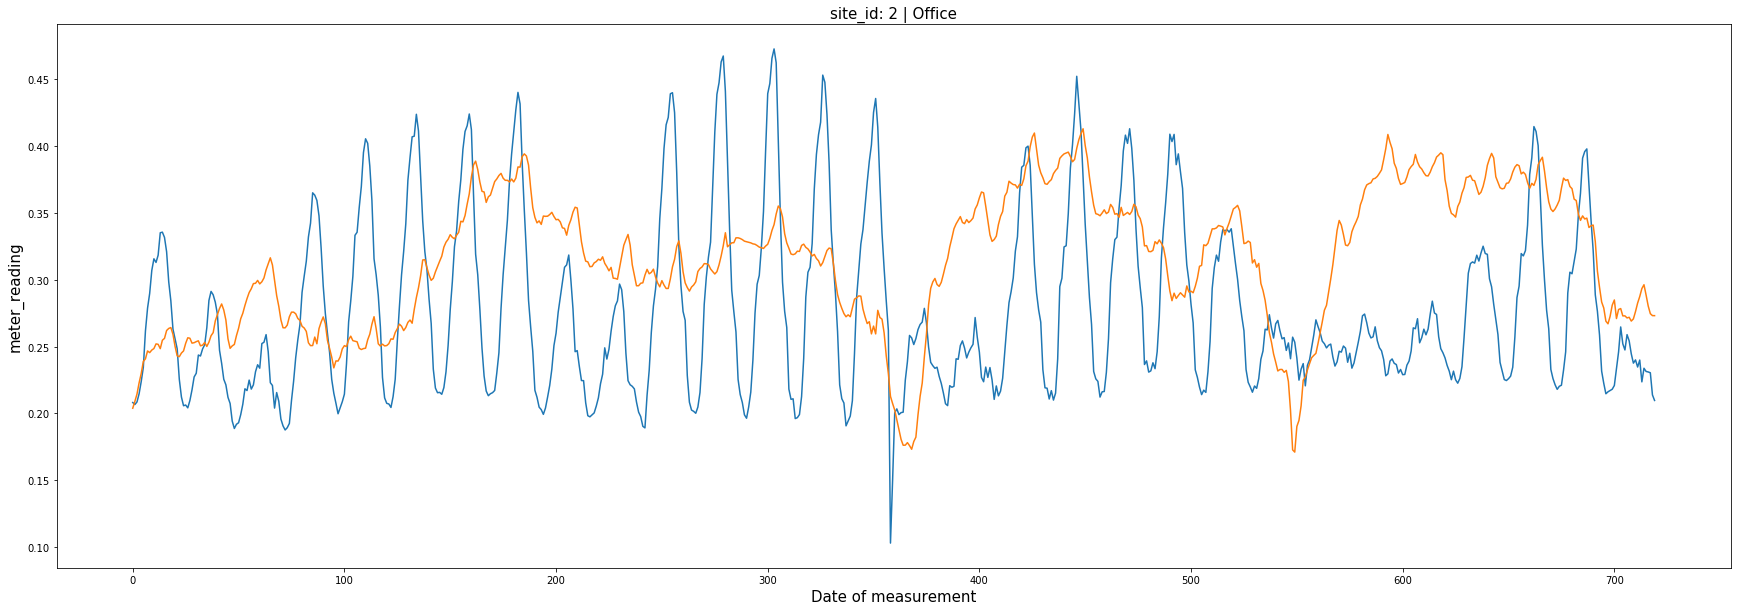

In [126]:
fig = plt.figure(figsize=(30,10))
plt.title('site_id: 2 | Office' ,fontsize=15)
plt.xlabel("Date of measurement",fontsize=15)
plt.ylabel("meter_reading",fontsize=15)
plt.plot(total3['meter_reading'][-720:].reset_index(drop = True))
plt.plot(model_4.predict(n_periods = 720, exogenous=total3.iloc[-720:,2:]))

In [127]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8064
Model:               SARIMAX(5, 1, 3)   Log Likelihood               15952.340
Date:                Fri, 22 Nov 2019   AIC                         -31874.681
Time:                        12:28:07   BIC                         -31769.755
Sample:                             0   HQIC                        -31838.781
                               - 8064                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.971e-06   5.17e-05      0.077      0.939   -9.73e-05       0.000
x1             0.0350      0.018      1.932      0.053      -0.001       0.070
x2             0.0509      0.013      4.051      0.000       0.026       0.076
x3            -0.0362      0.006     -5.729      0.000      -0.049      -0.024
x4             0.3171      0.027     11.766      0.000       0.264       0.370
x5             0.0006      0.003      0.203      0.839      -0.005       0.006
ar.L1          1.1128      0.026     43.370      0.000       1.063       1.163
ar.L2         -0.4087      0.048     -8.558      0.000      -0.502      -0.315
ar.L3          0.3208      0.048      6.711      0.000       0.227       0.414
ar.L4          0.0501      0.017      3.012      0.003       0.018       0.083
ar.L5         -0.2991      0.007    -42.446      0.000      -0.313      -0.285
ma.L1         -0.7273      0.026    -28.141      0.000      -0.778      -0.677
ma.L2          0.1825      0.040      4.559      0.000       0.104       0.261
ma.L3         -0.3228      0.034     -9.521      0.000      -0.389      -0.256
sigma2         0.0011   6.57e-06    169.696      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                     2531.51   Jarque-Bera (JB):            451709.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
total3.head()

,timestamp,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
0,2016-01-01 00:00:00,0.221033,0.297778,0.286420,0.007519,0.553633,0.233766
1,2016-01-01 01:00:00,0.220558,0.260000,0.286420,0.007519,0.564014,0.266234
2,2016-01-01 02:00:00,0.224972,0.246667,0.286420,0.007519,0.577855,0.201299
3,2016-01-01 03:00:00,0.233563,0.222222,0.274074,0.007519,0.598616,0.201299
4,2016-01-01 04:00:00,0.239860,0.211111,0.259259,0.007519,0.612457,0.201299


In [0]:
tmp = pd.DataFrame(date_tmp).rename(columns = {'timestamp' : 'weekday'})

In [0]:
date_tmp = total3['timestamp']

In [0]:
tmp['weekday'] = pd.to_datetime(tmp['weekday'])

In [135]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 1 columns):
weekday    8784 non-null int64
dtypes: int64(1)
memory usage: 68.8 KB


In [134]:
tmp = pd.DataFrame(tmp.set_index('weekday').index.weekday)

AttributeError: ignored